# spotiPylot
## The collaborative playlist generator.
### By: David Andexler
Proof-of-Concept
Description: A Python application that allows users to generate collaborative playlists based on music each participant is likely to enjoy. In the current iteration, best results will be obtained with fewer than five participants.

Overview of concept: Accept three playlists. These playlists are, in theory, representative of independent users with distinct musical interests. Perform fuzzy clustering to identify 3 non-exclusive clusters

<br> Estimated time: ~8 hours
<br> Actual time: ~10 hours
<br> Extensible: Yes
<br> Next steps: Build a front-end application in JavaScript and move beyond demo playlists. Allow for retrieval of public playlists and selective inclusion of each playlist by contributing user.

### Utility Functions
Located in util.py. Will be integrated into dedicated application beyond Jupyter concept.
<ul>
<li> get_users() </li>
<li> get_playlists(spotify, users) </li>
<li> get_track_features(spotify, playlist_information) </li>
<li> plot_distributions(df, drop=None) </li>
</ul>

## <br>Setting Up the Environment
Packages loaded. Local environment variables were created for SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET, and SPOTIFY_USER_ID to hide these sensitive items. Subsequently imported using the os module.

### Import packages

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import util

### Loading Environment Variables

In [2]:
SPOTIFY_CLIENT_ID = os.environ['SPOTIFY_CLIENT_ID']
SPOTIFY_CLIENT_SECRET = os.environ['SPOTIFY_CLIENT_SECRET']
SPOTIFY_REDIRECT_URI = 'http://localhost:8888/callback/'
username = os.environ['SPOTIFY_USER_ID']

 ## <br> Authorization

### Client Authorization

In [3]:
scope = 'playlist-modify-public'
user_token = spotipy.util.prompt_for_user_token(username, scope, SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET, SPOTIFY_REDIRECT_URI)
spotify = spotipy.Spotify(auth=user_token)

## <br> Data Acquisition

### Get Playlist Tracks
For demonstration purposes, three pre-populated playlists are utilized, representing three independent users using the application to collaborate on a shared playlist. The example playlists have a general "theme" and the tracks were selected based only on the "theme" and my general familiarity with the music. For the purposes of this notebook, three playlists are loaded in below. However, if successfully authenticated through Spotify API, running the below code block will allow user to enter any number of Spotify usernames, view all public playlists, and opt to include the playlists in the analysis.

Playlist composition can be viewed directly on Spotify.
<br>
<a href ="https://open.spotify.com/playlist/2V4jDbJJT7S575jdvrBuzV">User 1 </a>
<br>
<a href ="https://open.spotify.com/playlist/3gEikQyspYXdGwOdZwiFOj">User 2 </a>
<br>
<a href ="https://open.spotify.com/playlist/2I9p1xsjQGKljEviMQM5Lm">User 3 </a>

In [4]:
users = util.get_users()
playlist_information = util.get_playlists(spotify=spotify, users=users)
playlist_information

Enter Spotify username or user ID: dandexler
Enter another user? [y/n] n
Users selected:  ['dandexler'] 


User:  dandexler
Playlist Information: 
name                                            git init Playlist
description                           spotiPylot example playlist
id                                         4HQZWfYLja8sps8Gkk10EY
tracks          https://api.spotify.com/v1/playlists/4HQZWfYLj...
total_tracks                                                  100
dtype: object

Include playlist? [y/n] [> next user, q=done] n


Playlist Information: 
name                                                        User3
description                                                      
id                                         2I9p1xsjQGKljEviMQM5Lm
tracks          https://api.spotify.com/v1/playlists/2I9p1xsjQ...
total_tracks                                                   50
dtype: object

Include playlist? [y/n] [> next user, q=done] y


Playlist Information: 
name             

,name,description,id,tracks,total_tracks
0,User1,,2V4jDbJJT7S575jdvrBuzV,https://api.spotify.com/v1/playlists/2V4jDbJJT...,50
1,User2,,3gEikQyspYXdGwOdZwiFOj,https://api.spotify.com/v1/playlists/3gEikQysp...,50
2,User3,,2I9p1xsjQGKljEviMQM5Lm,https://api.spotify.com/v1/playlists/2I9p1xsjQ...,50


<center> <b> Table 01: Demo playlists and identifying information. <b> </center>

### Format Final DataFrame
Salient audio features needed for the preliminary analysis are extracted and formatted. Information about each audio feature can be found at <a href = "https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/"> Spotify for Developers </a>.

In [5]:
final_df = util.get_track_features(spotify=spotify, playlist_information=playlist_information)
final_df = final_df.drop(columns=['track_id', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'time_signature'])
final_df

,playlist_name,artist_name,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,User1,Galantis,Holy Water,0.587,0.734,9,-4.558,1,0.0407,0.06530,0.000571,0.3980,0.401,125.848,176657
1,User1,Loud Luxury,I'm Not Alright - EDX's Dubai Skyline Remix,0.769,0.879,1,-4.336,0,0.0704,0.03820,0.000018,0.0848,0.521,124.032,167549
2,User1,Skrillex,Midnight Hour with Boys Noize & Ty Dolla $ign,0.795,0.899,0,-4.202,1,0.0685,0.00235,0.000392,0.1990,0.329,125.978,198839
3,User1,Boys Noize,& Down,0.619,0.629,1,-4.109,0,0.3300,0.04730,0.227000,0.3140,0.262,123.003,258133
4,User1,Galantis,Faith (with Dolly Parton) [feat. Mr. Probz],0.547,0.795,8,-3.721,1,0.0489,0.14500,0.000000,0.1100,0.723,118.118,186805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,User3,Maroon 5,Memories,0.764,0.320,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.575,91.019,189486
146,User3,Doja Cat,Say So,0.787,0.673,11,-4.577,0,0.1580,0.25600,0.000004,0.0904,0.786,110.962,237893
147,User3,Alicia Keys,Underdog,0.655,0.722,0,-4.726,0,0.0480,0.55600,0.000000,0.1330,0.298,90.099,208208
148,User3,Selena Gomez,Look At Her Now,0.753,0.564,10,-7.908,0,0.2520,0.11400,0.027300,0.3590,0.550,77.342,162596


<center> <b> Table 02: Combined Tracks and Audio Features.

## <br>Analysis

### Exploratory Data Analysis
Playlist name, artist name, track name, and time signature were dropped from the EDA table. Kernel density estimates were generated for each numeric variable.

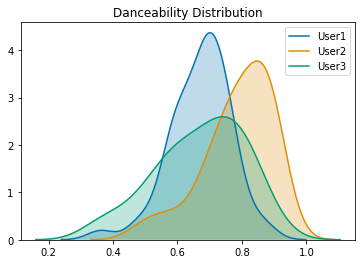

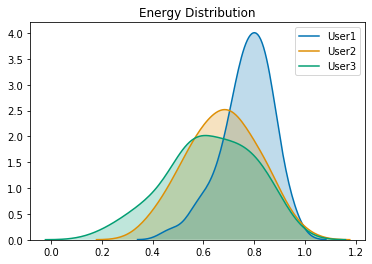

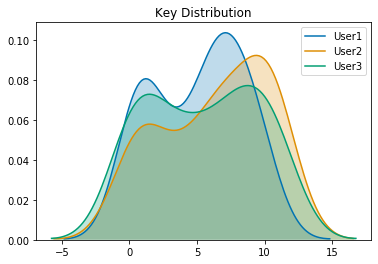

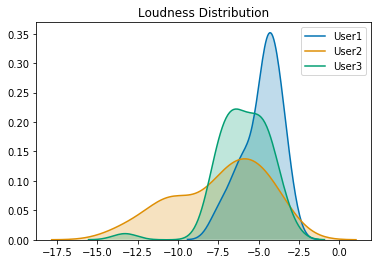

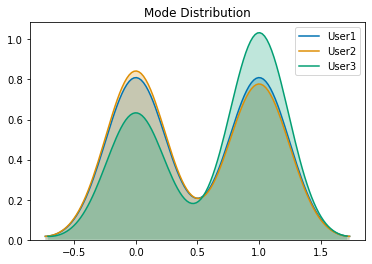

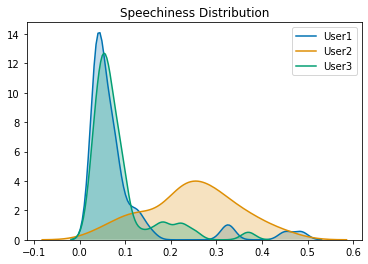

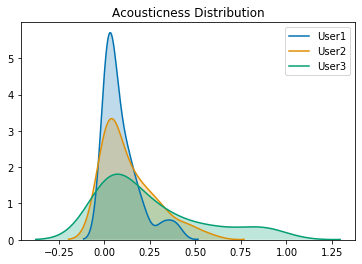

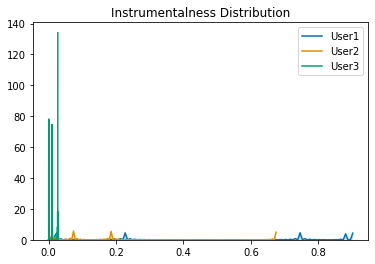

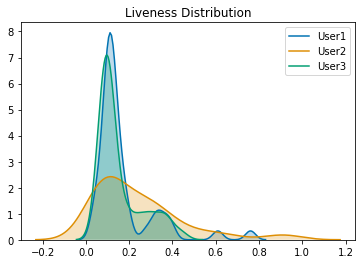

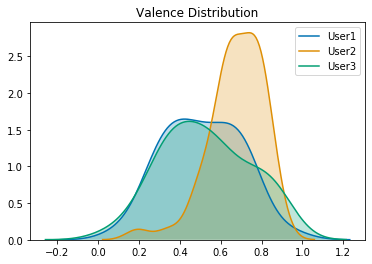

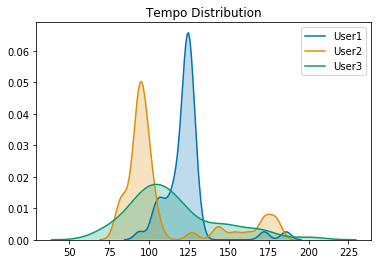

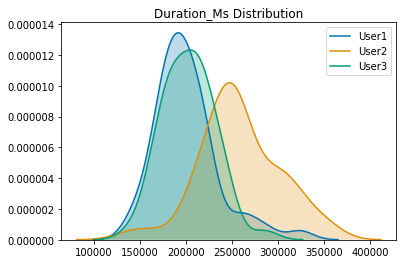

In [6]:
util.plot_distributions(final_df, drop=['playlist_name', 'artist_name', 'track_name'])

<center> <b> Figure 01 - Figure 12: Distributions of Audio Features. </b> </center>

## <br> Clustering Using Fuzzy Sets

The aim of this project is to identify the joint similarities between all users (represented by each playlist). Some clustering techniques force all observations to be in one of the identified clusters. In this concept presentation, I would like to allow for a nuanced approach to musical similarity by allowing clusters based on fuzzy sets (Zadeh, 1965). Given more time, I would like to pursue a density-based approach or overlapping clustering techniques (Baadel et al. 2016). 

Fuzzy clustering is a clustering technique that utilizes sets in which each element has degrees of membership in the others. Given that users may have overlapping musical interests, this clustering technique seems appropriate for experimentation. Fuzzy c-means is a computationally-intensive algorithm. Thus, I will standardize the input data and perform principal component analysis (PCA) to reduce dimensionality.


### Import Packages

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz

### Principal Component Analysis 
Projecting the playlist features into fewer dimensions.

#### Standardizing the Features
Features were standardized using scikit-learn's StandardScaler.

In [9]:
final_df_drop = final_df.drop(columns=['playlist_name', 'artist_name', 'track_name'])
stdz_values = StandardScaler().fit_transform(final_df_drop)

#### PCA
The number of principal components was selected by roughly optimizing variance explained against complexity. Six principal components were selected to explain ~73% of the variance in the playlists. If I selected two dimensions, variance explained would be ~ 45%. Though I am giving up visualization capabilities, I believe this will lead to better playlist selections.

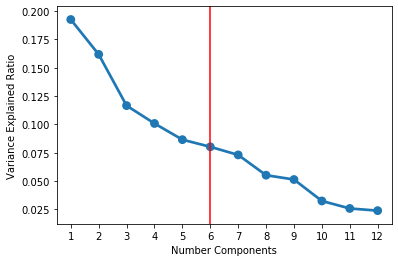

In [14]:
components =  [x+1 for x in range(12)]
pca_obj = PCA(n_components=12)
pca_obj.fit_transform(stdz_values)

# Scree plot and selected number of principal components
p1 = sns.pointplot(x=components, y=pca_obj.explained_variance_ratio_)
p1.set(xlabel='Number Components', ylabel='Variance Explained Ratio')
plt.axvline(5, 0, 1.2, color='r')

<b> Figure 13: Scree plot of variance explained against number of principal components.

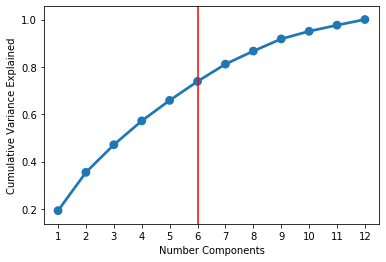

In [15]:
# Cumulative sum of variance explained graph with selected components
p2 = sns.pointplot(x=components, y=np.cumsum(pca_obj.explained_variance_ratio_))
p2.set(xlabel='Number Components', ylabel='Cumulative Variance Explained')
plt.axvline(5, 0, 1, color='r')

<b> Figure 14: Variance explained against number of prinicpal components.

#### PCA, continued.
Six principal components were selected and fitted to the standardized data.

In [16]:
pca_obj = PCA(n_components=6)
pca_data = pca_obj.fit_transform(stdz_values)
pcaDF = pd.DataFrame(pca_data, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
pcaDF

,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.567740,-0.475594,0.777692,-0.578034,1.566683,1.066711
1,-1.515630,-1.306424,-0.850628,0.400380,-0.322091,-1.216521
2,-1.794482,-1.196157,-0.889487,-0.457614,-0.734190,0.308115
3,-0.028468,-0.270606,1.547311,0.463080,-1.505909,-0.983203
4,-1.486854,-0.609804,0.137631,0.016357,0.346762,0.837683
...,...,...,...,...,...,...
145,0.393865,3.810306,-0.515019,0.049899,1.412192,0.644996
146,1.039747,-0.307006,0.091723,0.729634,0.514099,-0.649004
147,-1.631929,1.439456,-0.173019,0.415184,-0.326754,-2.064923
148,1.301020,0.441615,-0.220721,0.061389,2.107346,-0.921669


<b> Table 04: Three original playlist audio features projected along six principal components.

### Fuzzy C-Means Clustering
Three fuzzy clusters are set. Max iterations will be 1000 unless error stopping criterion=0.005. Seed set to 1234 for reproducibility. Visualization of clusters are not possible for 6-dimensional PCA components.

Context for each parameter can be found at <a href="https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html"> scikit-fuzzy </a>.

In [17]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data=pcaDF, c=3, m=2, error=0.005, maxiter=1000, init=None, seed=1234)
# Returns array rows x clusters, which are the centers of each feature for each cluster.

### Creating the Playlist

#### Using the Fuzzy C-Means clusters 

To populate the playlist, I am looking for 100 songs that have the highest membership in all three fuzzy c-means clusters. This data was obtained from a <a href="https://www.kaggle.com/tomigelo/spotify-audio-features">Kaggle dataset </a> and contains 130,000 tracks and their corresponding audio features. This data set was updated April 2019.

In [20]:
new_tracks = pd.read_csv("C:/Users/dande/Documents/Projects/spotiPylot/data/SpotifyAudioFeaturesApril2019.csv")
new_tracks

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


<center><b> Table 05: Audio features of 130,000 tracks on Spotify as of April 2019.

##### PCA on the New Data
Before clustering, the new data are projected to six principal components to mirror the playlist data.

In [21]:
new_features = new_tracks.loc[:,final_df_drop.columns]
new_stdz_values = StandardScaler().fit_transform(new_features)
new_pca_obj = PCA(n_components=6)
new_pca_data = new_pca_obj.fit_transform(new_stdz_values)
new_pcaDF = pd.DataFrame(new_pca_data, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
new_pcaDF

,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.038361,-0.376015,-1.361434,-0.449930,-0.811005,3.732031
1,-1.866798,-0.756133,0.211169,-1.395835,-0.022642,2.172688
2,-1.114669,0.090969,1.391141,0.947898,-0.189057,-0.577185
3,-0.282912,-0.812589,0.759328,1.022540,-1.332837,-0.511328
4,-1.026178,-1.065339,-0.439545,1.212594,-1.218318,-1.190585
...,...,...,...,...,...,...
130658,-1.196377,0.689521,0.290072,0.985488,-0.163145,-0.428594
130659,2.032297,-0.616527,0.109336,0.151988,0.729830,-0.548366
130660,-1.066108,-1.073048,1.224389,0.427462,-0.691412,1.112910
130661,-0.517306,-0.048765,0.640778,0.294595,0.102582,0.537793


<b> Table 06: Six principal components of the new data.

#### Determining fuzzy c-means cluster membership
Randomly sample 150 songs from the PCA dataframe, use the fuzzy c-means to predict fuzzy partition coefficient. After n random draws, the sample with the highest FPC is loaded into the playlist. Had to remove seed to get different results. May get better results by increasing range at the expense of computation time. *See considerations

In [155]:
fpc = 0
for i in range(1000):
    new_pca_sample = new_pcaDF.sample(150)
    new_model = fuzz.cluster.cmeans_predict(new_pca_sample, cntr, 2, error=0.005, maxiter=1000)
    if new_model[-1] > fpc:
        new_df = new_pca_sample.copy() # If the FPC is greater than previous, saves FPC and the indices of the dataframe
        fpc = new_model[-1] # Updates FPC

#### Retrieving Selected Tracks
Retrieves by index.

In [170]:
final_full_tracks = new_tracks.iloc[new_df.index,:]
final_full_tracks

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
87457,Karyn White,2PPxPOwFtXjtGwMQMIotpf,Superwoman - Edit Version,0.18900,0.6640,272227,0.4630,0.000000,8,0.0490,-11.229,1,0.0388,138.166,4,0.560,16
128071,Galantis,592JiALLj5xL5Z6LuMmaOV,Spaceship (feat. Uffie) - MOTi Remix,0.05030,0.5070,189524,0.8830,0.000019,2,0.3820,-5.043,0,0.1180,125.989,4,0.219,70
19499,Eels,6LVvHf00o7oNX2bJD1dBHx,The Epiphany,0.94600,0.0918,138160,0.0979,0.133000,3,0.1600,-17.528,1,0.0369,72.876,3,0.142,34
126289,Janelle Monáe,2GATPLRMzHNwUmkxGgCoEP,I Like That - Recorded at Spotify Studios NYC,0.28500,0.5220,180551,0.5270,0.000002,0,0.1840,-7.358,1,0.0631,130.323,4,0.426,61
117380,BlocBoy JB,3s1oysOJN8WHAuEDCWI0vj,Rich Hoes (Feat. Hoodrich Pablo Juan),0.00795,0.7530,133733,0.7330,0.000015,1,0.0932,-7.383,1,0.2320,171.852,4,0.324,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49724,Toy Rock,2uy2NNd3mO0WZazHnYQgne,Chained to the Ryhming Pig,0.34800,0.8050,135141,0.1290,0.923000,4,0.1000,-24.860,0,0.1330,120.971,4,0.669,1
11953,Mathew V,3WbBGCHbUluDOCfrzAe3Ye,Let Me Go,0.44900,0.3330,209944,0.3890,0.000000,9,0.0919,-7.326,1,0.0353,165.419,4,0.247,40
126707,Lily James,19GsJOvgLVujgxcnDVd8FB,I Have A Dream,0.73800,0.5250,264440,0.3190,0.000000,0,0.2510,-12.566,1,0.0248,104.035,4,0.508,64
45200,Anything but Broke,49R5KH5SHUTljUU05r3TYV,Bearded Bandit,0.00216,0.8070,276643,0.7740,0.874000,3,0.0786,-6.990,0,0.0585,124.966,4,0.371,0


<center> <b> Table 07: Tracks selected by the clustering algorithm. </b> </center>

#### Creating the Playlist
<B>WARNING: THIS WILL CREATE A PLAYLIST ON YOUR PROFILE FOR EACH TIME YOU RUN IT. RUN ONCE.

In [181]:
new_playlist = spotify.user_playlist_create(username, 
                                            name="git init Playlist", 
                                            public=True, 
                                            description='spotiPylot example playlist')


#### Populating With Clustered Tracks
Spotify only allows 100 tracks to be populated per request.

In [186]:
spotify.user_playlist_add_tracks(user=username, 
                                 playlist_id=new_playlist['id'], 
                                 tracks=final_full_tracks.track_id.sample(100), 
                                 position=None)

{'snapshot_id': 'MyxjODRiOWJkOTY1MDc2ZjVmNWU5NDVmMDcxMWIzMjFlZTMzMjI5ZmY5'}

## Next Steps
<ul style="list-style-type:disc;">
  <li>Improve algorithm</li>
    <ul>
        <li>Multi-Cluster Overlapping K-means Extension (MCOKE)
    </ul>
  <li>Engineer new features for comparison </li>
  <li>Evaluate edge cases</li>
  <li>Create user interface/applet in JavaScript</li>
  <li>Improve song cataloguing for faster matching
  <li>Refactor some code, add list comprehensions, refactor the Seaborn graphics
  <li>Find a better way to find new songs, other than data set
  <li>Stress testing with playlists that are not "themed"
</ul>

### Considerations

#### Handling Multiple Artists
I do not know if the API can return multiple artists for a single track. There is an indexing feature within the JSON response that must be investigated. The code currently handles only one artist response per track.
#### Handling Multiple Users
Results may vary, depending on the number of users. Best results are likely obtained with 2-3 users. More work will be needed to scale.
#### More Time Needed for Clustering Parameters and Research
The qualitative nature of music enjoyment contributes to the imprecision of comparing clustering techniques. In the future, there is an opportunity for 
#### Can Only Draw Random Sample of Equal Size to Input Tracks for Prediction
Will need to explore the quirks of this package more in depth.
#### Data Set Used to Match Tracks May Be Flawed
Results may vary. More testing needed.

## Citations
Aggarwal, Charu C., Alexander Hinneburg, and Daniel A. Keim. "On the surprising behavior of distance metrics in high dimensional space." International conference on database theory. Springer, Berlin, Heidelberg, (2001).

Baadel, S., Thabtah, F., and Lu, J. "Overlapping clustering: A review," 2016 SAI Computing Conference, London, (2016): 233-237.

Bezdek, J. "Pattern Recognition with Fuzzy Objective Function Algoritms", Plenum Press, New York, (1981).

Dunn, J. "A Fuzzy Relative of the ISODATA Process and Its Use in Detecting Compact Well-Separated Clusters", Journal of Cybernetics 3: (1973): 32-57.


Zadeh, L.A. "Fuzzy sets." Information and control 8.3 (1965): 338-353.
